# Lecture 8 Homework Solutions

<br><br>

1.  Calculate the DC term for a 48x48 image.  Create the image array using the random number seed of 20,000.  Show that the DC term equals the sum of the input signal.


In [1]:
#  DC (the sum of the input signal, it is called the bias term) term example
import numpy as np
import scipy.fftpack as ft

np.random.seed(20000)
mga = np.random.ranf((48,48))
mgb = ft.fft2(mga)
print('\nSum of input signal:', round(mga.sum(),2))

print('\nDC Term:', np.round(mgb[0,0],2))

print('\nSum of input signal and DC Term are the same:', np.round(mga.sum()-mgb[0,0],2))


Sum of input signal: 1165.26

DC Term: (1165.26-0j)

Sum of input signal and DC Term are the same: (-0+0j)


<br><br><br><br><br><br><br><br><br><br><br><br>

2. Write python code to prove $\mathfrak{F}^{-1} \mathfrak{F} \mathbf{a}[\vec{x}] = \mathbf{a}[\vec{x}]$ for a 48x48 pixel image.  Use the random seed of 20,000 as in problem #1.  This shows that the energy is conserved and that there is no loss in the process.<br><br>


In [2]:
import numpy as np
import scipy.fftpack as ft

np.set_printoptions(precision=2)

np.random.seed(20000)
mga = np.random.ranf((48,48))

# left side of equation
mgb = ft.fft2(mga)
mgc = ft.ifft2(mgb)

mgd = mga - mgc
print(mgd)

mgc = ft.ifft2(mgb)
print('\nAre the two arrays the same:', np.allclose(mga, mgc))


[[ 0.00e+00+1.54e-18j  1.11e-16-7.71e-19j  1.11e-16-2.62e-17j ...
   1.11e-16+3.74e-17j  0.00e+00-5.86e-17j  1.11e-16+1.75e-17j]
 [-1.11e-16+1.93e-18j  1.11e-16+1.62e-16j -1.11e-16-2.67e-17j ...
  -1.11e-16-6.67e-17j -8.33e-17-2.19e-17j  0.00e+00+8.94e-17j]
 [ 1.11e-16+3.47e-18j  0.00e+00-5.40e-18j  1.11e-16-2.72e-17j ...
   5.55e-17-1.37e-17j  1.11e-16-3.41e-17j  2.22e-16-4.72e-17j]
 ...
 [-4.44e-16+8.87e-18j -3.33e-16-2.74e-17j -5.55e-16+1.01e-17j ...
  -2.22e-16+1.61e-17j -1.67e-16+8.43e-17j -3.33e-16+5.94e-17j]
 [-5.55e-17+1.05e-16j  1.11e-16+6.91e-18j  1.80e-16+5.21e-17j ...
   2.22e-16-8.63e-17j  1.11e-16-2.52e-17j  1.67e-16+9.94e-17j]
 [-3.33e-16-5.68e-18j -2.22e-16+2.66e-18j -1.11e-16-3.92e-17j ...
   8.33e-17+9.86e-17j  0.00e+00-8.63e-17j -3.33e-16-7.71e-17j]]

Are the two arrays the same: True


<br><br><br><br><br><br><br><br><br><br><br><br><br><br>
3. Create a Kaiser Mask with a frame size of (256, 256) and a mask centered on (128, 128) with pixel values of one inside the radius of 40 decaying to zero at 60.  Repeat the problem with the pixel values of one inside the radius of 10 decaying to zero at 60.  Describe you observations comparing the two images.<br><br>

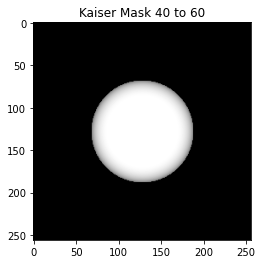

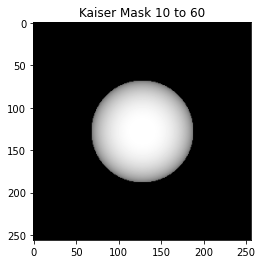

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def KaiserMask(shape, center, r1, r2):
    # returns a mask that you can use over and over again.
    di, dj = center  # location of the center of the window
    v,h = shape
    theta = 2. * np.pi
    Iot = 1.0 + theta/4. + 2.*theta/64. + 3.*theta/2304.
    
    # compute radii
    vindex = np.multiply.outer(np.arange(v), np.ones(h))
    hindex = np.multiply.outer(np.ones(v), np.arange(h))
    a = (di-vindex).astype(float)
    b = dj-hindex
    r = np.sqrt(a*a + b*b)
    del a,b
    
    # inside r1, and outside r2 are easy
    mask = np.zeros(shape, float)
    mask = (r < r1).astype(int)
    # work on the ring between
    b = np.logical_and((r<r2), (r>r1))
    m = (r-r1)/(r2-r1)
    m = m*b
    a = theta * np.sqrt(1.-m*m)
    a = 1.0 + a/4.0 + 2.0*a/64.0 + 3.0*a/2304.0
    a = a / Iot
    a = a * (r< r2)
    a = a * (r>=r1).astype(int)
    mask = mask + a
    return mask

mask = KaiserMask((256,256), (128,128), 40, 60)
plt.title('Kaiser Mask 40 to 60')
plt.imshow(mask, cmap='gray')
plt.show()

mask = KaiserMask((256,256), (128,128), 10, 60)
plt.title('Kaiser Mask 10 to 60')
plt.imshow(mask, cmap='gray')
plt.show()
